# **Preprocessing**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Liz283/DataMining/main/heart.csv"
data = pd.read_csv(url)

# Define categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Define the ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessing to the dataset, excluding the target variable if present
X_processed = preprocessor.fit_transform(data.drop(['target'], axis=1) if 'target' in data.columns else data)
y = data['target'] if 'target' in data.columns else None


# **Parameter Optimization**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Assume X_processed and y are already defined as per your preprocessing steps

# Define the parameter grid
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
random_states = [0, 42, 100]

best_accuracy = 0
best_params = {'test_size': None, 'random_state': None}

# Iterate over all combinations of test_size and random_state
for test_size in test_sizes:
    for random_state in random_states:
        # Split the dataset
        X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=test_size, random_state=random_state)

        # Initialize and fit Naive Bayes model
        nb_classifier = GaussianNB()
        nb_classifier.fit(X_train, y_train)

        # Predict and evaluate accuracy
        y_pred_nb = nb_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred_nb)

        # Update best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['test_size'] = test_size
            best_params['random_state'] = random_state

# Print the best parameters and their accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


Best Parameters: {'test_size': 0.1, 'random_state': 100}
Best Accuracy: 0.883495145631068


# **Prediction**

Results for Naive Bayes:

               Predicted No Disease  Predicted Disease
Is No Disease                    39                  6
Is Disease                        6                 52

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.90      0.90      0.90        58

    accuracy                           0.88       103
   macro avg       0.88      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103


Accuracy Score: 88.35%

Confusion Matrix:


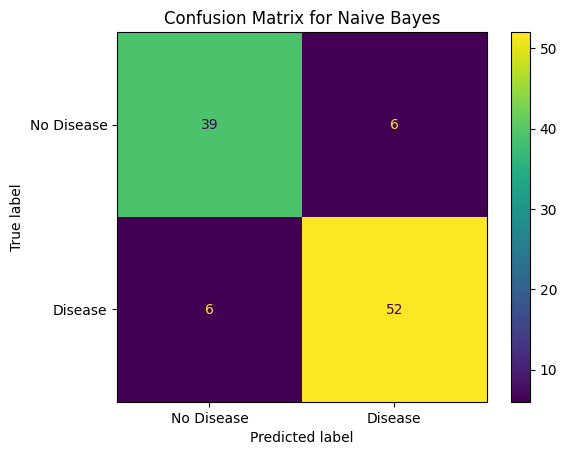

In [21]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.1, random_state = 100)

# Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

def print_nb_results(y_test, y_pred_nb, accuracy_nb):
    matrix_nb = confusion_matrix(y_test, y_pred_nb)
    label_names = ['No Disease', 'Disease']
    confusion_df_nb = pd.DataFrame(matrix_nb, columns=['Predicted ' + label for label in label_names], index=['Is ' + label for label in label_names])
    print("Results for Naive Bayes:\n")
    print(confusion_df_nb)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_nb))
    print(f"\nAccuracy Score: {accuracy_nb*100:.2f}%")
    print("\nConfusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, display_labels=label_names)
    plt.title('Confusion Matrix for Naive Bayes')
    plt.show()
print_nb_results(y_test, y_pred_nb, nb_accuracy)